# Face Reconition

In [2]:
from sklearn.datasets import fetch_lfw_people     # 7 people 1000 photos
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import numpy as np

faces = fetch_lfw_people(min_faces_per_person=60)   # Everyone chooses 60 photos
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [6]:
faces.data.shape     #1348 pics, and 2914 pixels of every pic

(1348, 2914)

In [7]:
faces.images.shape   #62*47 = 2914 pixels    62 rows, 47 columns     1348 pics

(1348, 62, 47)

In [22]:
X = faces.data

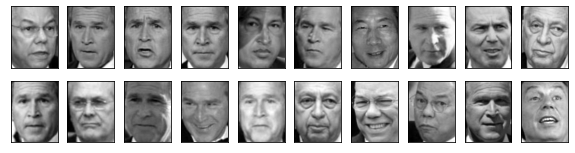

In [41]:
# Original Photos
fig, axes = plt.subplots(2, 10               # 4rows 5columns pics,totol 20 pics
                         , figsize=(10, 2.5)  
                         , subplot_kw={"xticks": [], "yticks": []}  
                         )
print(enumerate(axes.flat))         #axes.flat是一维，list enumerate是给list遍历用的，遍历数字同时也遍历对象

# fill the frames
for i, ax in enumerate(axes.flat):
    im= ax.imshow(faces.images[i, :, :]
              , cmap="gray" 
              )              # i is 0-19， ax is All the objects in axes

plt.show()


# Decomposition

In [32]:
# 2900 dimension to 15 dimension, get new features
pca = PCA(150).fit(X)       
X_dr = pca.transform(X)

#x_dr.shape   #(1348,150)

In [33]:
V = pca.components_         # New demention
V.shape                     #V（k，n）   (150, 2914)

(150, 2914)

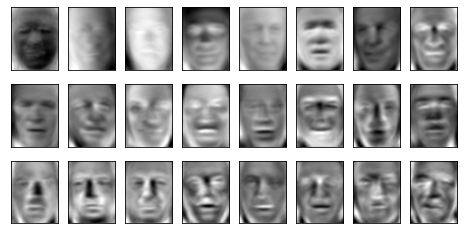

In [34]:
fig, axes = plt.subplots(3, 8, figsize=(8, 4), subplot_kw={"xticks": [], "yticks": []})

for i, ax in enumerate(axes.flat):
    ax.imshow(V[i, :].reshape(62, 47), cmap="gray")

In [35]:
# use inverse_transform put back to original space   (150, 2914) back to （1348,2914）
X_inverse = pca.inverse_transform(X_dr)         # X_inverse is face.data decomposition

print(X_inverse.shape)  
print(faces.images.shape) 

(1348, 2914)
(1348, 62, 47)


[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]]


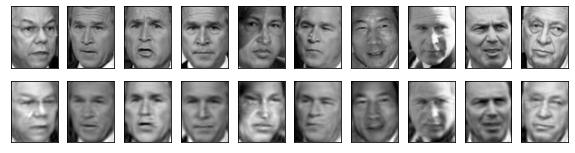

In [43]:
# Visualize the features
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5)         #2 rows 10 columns
                       , subplot_kw={"xticks": [], "yticks": []}    
                       )
print(ax)         #print the frames       

for i in range(10):
    ax[0, i].imshow(faces.images[i, :, :], cmap="binary_r")
    ax[1, i].imshow(X_inverse[i].reshape(62, 47), cmap="binary_r")      

plt.show()              # photos same with the original, but not as clear as the original due to the decomposision
                        # decomposition is irreversible.